In [26]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Create a path to the folder
path = "../data/trends_data"
all_files = glob.glob(path + "/*.csv")
dfs = []
for filename in all_files:
    df = pd.read_csv(filename, skiprows=2)

    #Normalize column names: first column should always be Week
    df.rename(columns={df.columns[0]: 'Week'}, inplace=True)

    brand_name = filename.split('/')[-1].replace('.csv', '')
    df.rename(columns={df.columns[1]: brand_name}, inplace=True)

    # Replace "< 1" in CSV files and convert it to numeric
    df[brand_name] = df[brand_name].replace('<1',0.5).astype(float)

    dfs.append(df)


In [27]:
combined = dfs[0]

# Merge all dataframes on 'Week'
for df in dfs[1:]:
    combined = pd.merge(combined, df, on='Week', how='outer')

# Sort by Week and clean
combined = combined.sort_values('Week')
combined.fillna(0, inplace=True)

# Clean '< 1' values
combined.replace('<1', 0, inplace=True)

# Convert numeric columns properly 
for col in combined.columns[1:]:
    combined[col] = pd.to_numeric(combined[col], errors='coerce')

combined['Week'] = pd.to_datetime(combined['Week'])
combined = combined.sort_values('Week')




In [28]:
print(combined.columns)

Index(['Week', 'google_trends_alo', 'google_trends_lululemon',
       'google_trends_athleisure', 'google_trends_SKIMS',
       'google_trends_gymshark', 'google_trends_fabletics'],
      dtype='object')


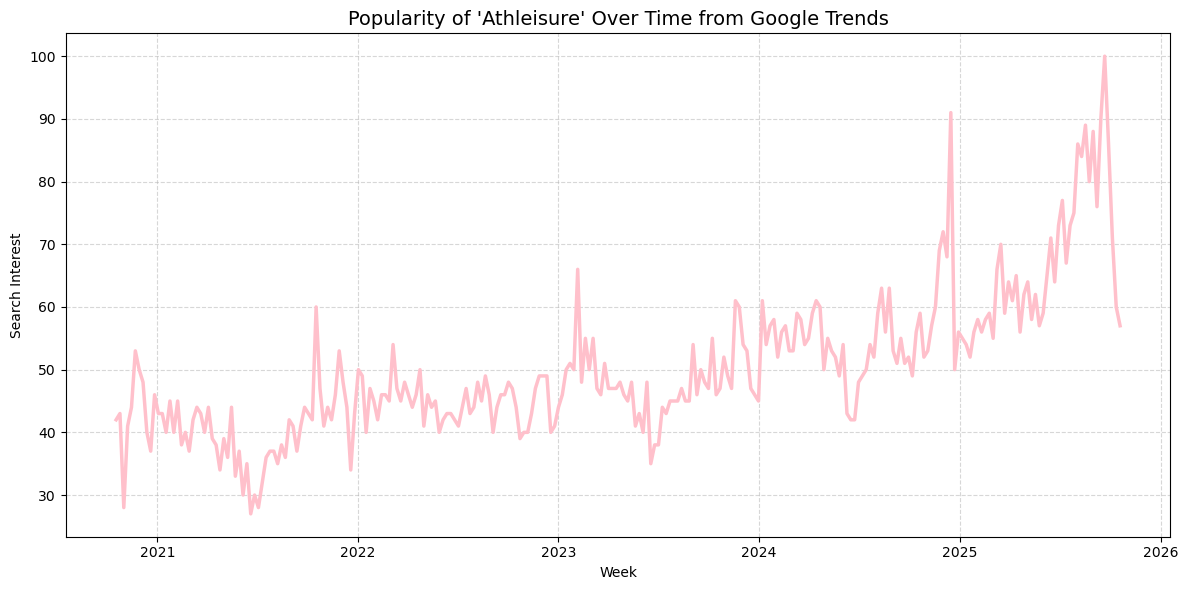

In [29]:
# Shows the popularity of the trend 'Athleisure' over the last 5 years

# Plot
plt.figure(figsize=(12,6))
plt.plot(combined['Week'], combined['google_trends_athleisure'], color='pink', linewidth=2.5)
plt.title("Popularity of 'Athleisure' Over Time from Google Trends", fontsize=14)
plt.xlabel("Week")
plt.ylabel("Search Interest")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


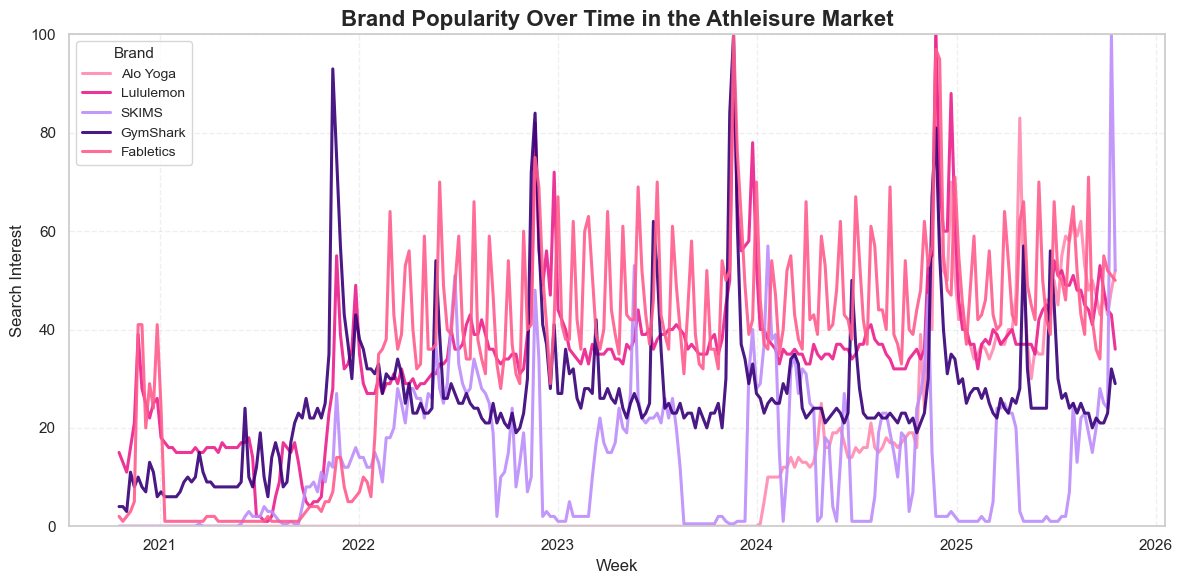

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style='whitegrid',
    rc={'axes.facecolor': '#ffffff', 'grid.alpha': 0.3}
)

# 🎨 Defining  custom color palette for branding
custom_palette = ["#FF8AAF", "#EC1F8C", "#BD8DFB", "#360078", "#FF5C8D"]

# Apply palette globally
sns.set_palette(custom_palette)

# --- Plot Section ---

plt.figure(figsize=(12, 6))

brand_nicknames = {
    'google_trends_alo': 'Alo Yoga',
    'google_trends_fabletics': 'Fabletics',
    'google_trends_lululemon': 'Lululemon',
    'google_trends_SKIMS': 'SKIMS',
    'google_trends_gymshark': 'GymShark'
}

# Exclude non-brand columns
exclude_cols = ['week', 'athleisure', 'google_trends_athleisure']
brand_cols = [col for col in combined.columns if col.lower() not in exclude_cols]

# 💡 Plot each brand with your custom palette
for i, col in enumerate(brand_cols):
    plt.plot(
        combined['Week'],
        combined[col],
        label=brand_nicknames.get(col, col),
        linewidth=2.2,
        alpha=0.9,
        color=custom_palette[i % len(custom_palette)]
    )

plt.title("Brand Popularity Over Time in the Athleisure Market", fontsize=16, weight='bold')
plt.xlabel("Week", fontsize=12)
plt.ylabel("Search Interest", fontsize=12)
plt.ylim(0, 100)
plt.legend(title="Brand", fontsize=10, title_fontsize=11, loc='upper left', frameon=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
